# Test of Image Processing Workflows by Tobias

In [1]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

In [3]:
@is_fairstep(label='Rotating an image represented as a string by 90 degrees')
def rotate_image(img):
    return img.transpose(Image.ROTATE_90)

In [4]:
@is_fairstep(label='Inverting the colors of an image')
def invert_colors(img):
    from PIL import Image, ImageOps
    return ImageOps.invert(img)

In [5]:
@is_fairstep(label='Add blur to image')
def blur(img):
    from PIL import ImageFilter
    return img.filter(ImageFilter.BLUR)

In [7]:
@is_fairstep(label='Overlay two images')
def overlay(bg_img, fg_img):
    img = bg_img.copy()
    fg_img = fg_img.convert("RGBA")
    img.paste(fg_img, (0, 0), fg_img)
    return img

In [8]:
@is_fairstep(label='Convert white to transparency')
def white_to_transparency(img):
    from PIL import Image
    img = img.convert("RGBA")
    data = img.getdata()
    new_data = []
    for item in data:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            new_data.append((255, 255, 255, 0))
        else:
            new_data.append(item)
    img.putdata(new_data)
    return img

In [9]:
@is_fairworkflow(label='My Workflow')
def my_workflow(img1, img2):
    return overlay(blur(img1), white_to_transparency(img2))

In [11]:
from PIL import Image

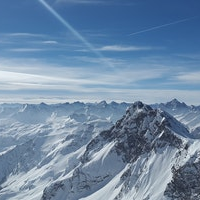

In [12]:
input1 = Image.open("img/mountains.png")
input1

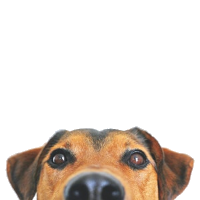

In [13]:
input2 = Image.open("img/dog.png")
input2

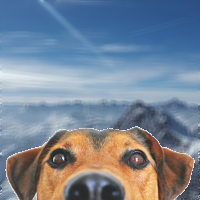

In [14]:
fw = FairWorkflow.from_function(my_workflow)
result, prov = fw.execute(input1, input2)
result

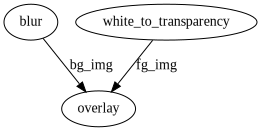

In [15]:
fw.display()